In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h = 0.01
N = 2000

a = 0.2
b = 0.2
c = 3.0

v_curr = np.array([-1,1])
v_all = np.zeros((N,2))
v_all[0,:] = v_curr

def fitzhugh_derivs(v, a=a, b=b, c=c):
    return np.array([c * (v[0] - v[0]**3/3 + v[1]), -1/c * (v[0] - a + b*v[1])])

for i in range(1,N):
    v_curr = v_curr + fitzhugh_derivs(v_curr) * h
    v_all[i,:] = v_curr

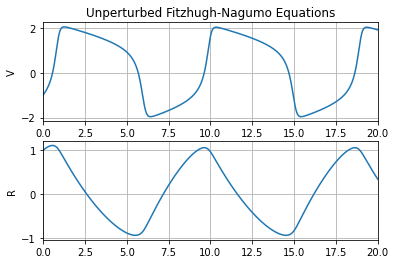

In [8]:
ax1 = plt.subplot(211)
ax1.set_xlim(0,h*N)
ax1.set_xlabel('time')
ax1.set_ylabel('V')
plt.title('Unperturbed Fitzhugh-Nagumo Equations')
ax1.grid()
plt.plot(np.linspace(0,N*h,N), v_all[:,0])

ax2 = plt.subplot(212, sharex=ax1)
ax2.set_ylabel('R')
ax2.grid()
plt.plot(np.linspace(0,N*h,N), v_all[:,1])

plt.show()

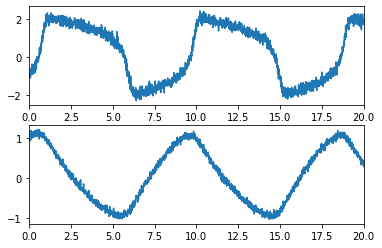

In [39]:
ground_truth = np.copy(v_all)
noise_v = 0.15 * np.random.randn(N,1)
noise_r = 0.05 * np.random.randn(N,1)
noisy_data = np.copy(ground_truth) + np.hstack((noise_v,noise_r))

ax1 = plt.subplot(211)
ax1.set_xlim(0,h*N)
plt.plot(np.linspace(0,N*h,N), noisy_data[:,0])

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(np.linspace(0,N*h,N), noisy_data[:,1])

plt.show()

In [42]:
v_curr = np.array([-1,1])
v_all = np.zeros((N,2))
v_all[0,:] = v_curr

v_noise_param = 0.03
r_noise_param = 0.01

for i in range(1,N):
    v_curr = (v_curr + fitzhugh_derivs(v_curr) * h + np.random.randn(1,2) * np.array([v_noise_param, r_noise_param])).flatten()
    v_all[i,:] = v_curr

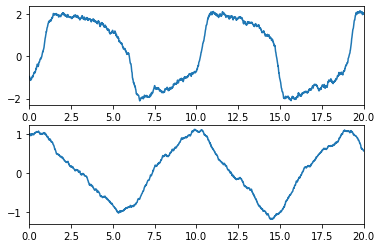

In [43]:
noisy_soln = np.copy(v_all)

ax1 = plt.subplot(211)
ax1.set_xlim(0,h*N)
plt.plot(np.linspace(0,N*h,N), noisy_soln[:,0])

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(np.linspace(0,N*h,N), noisy_soln[:,1])

plt.show()